<a href="https://colab.research.google.com/github/YinkaOlu/MachineLearningRepo/blob/main/jupyter/huggy_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
pip install datasets[vision]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
from datasets import load_dataset, Image

data_files = {"train": "train.csv", "test": "test.csv"}

train_dataset = load_dataset("beans", 'full', split="train")
test_dataset = load_dataset("beans", 'full', split="test")

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset beans downloaded and prepared to /root/.cache/huggingface/datasets/beans/full/0.0.0/90c755fb6db1c0ccdad02e897a37969dbf070bed3755d4391e269ff70642d791. Subsequent calls will reuse this data.


In [56]:
import tensorflow as tf

# Import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [57]:
tf_train_dataset = train_dataset.to_tf_dataset(
    columns=["image", "image_file_path"],
    label_cols=["labels"],
    batch_size=2,
    shuffle=True)

tf_test_dataset = test_dataset.to_tf_dataset(
    columns=["image", "image_file_path"],
    label_cols=["labels"],
    batch_size=2,
    shuffle=True)

In [61]:
pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
from PIL import Image

print(train_dataset)

def normalize(examples):
  image_path = examples["image_file_path"]
  examples["pixel_values"] = Image.open(image_path).convert('RGB')
  return examples


train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

Dataset({
    features: ['image_file_path', 'image', 'labels'],
    num_rows: 1034
})


  0%|          | 0/1034 [00:00<?, ?ex/s]

  0%|          | 0/128 [00:00<?, ?ex/s]

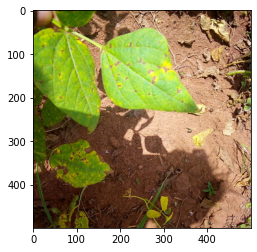

In [78]:
img = train_dataset[0]["pixel_values"]
plt.imshow(img)

In [83]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(500, 500, 3)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [84]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [85]:
tf_ds = train_dataset.to_tf_dataset(
            columns=["pixel_values"],
            label_cols=["labels"],
            batch_size=2,
            shuffle=True
            )

In [86]:
model.fit(tf_ds, epochs=2)

Epoch 1/2
517/517 [==============================] - 191s 367ms/step - loss: 44810.1211 - accuracy: 0.4642
Epoch 2/2
517/517 [==============================] - 186s 360ms/step - loss: 4248.7031 - accuracy: 0.4323


In [90]:
test_dataset_tf_ds = test_dataset.to_tf_dataset(
            columns=["pixel_values"],
            label_cols=["labels"],
            batch_size=2,
            shuffle=True
            )


test_loss, test_accuracy = model.evaluate(test_dataset_tf_ds)
print('Accuracy on test dataset:', test_accuracy)

64/64 [==============================] - 5s 79ms/step - loss: 55.3092 - accuracy: 0.3359
Accuracy on test dataset: 0.3359375


In [91]:
for test_images, test_labels in test_dataset_tf_ds.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

1/1 [==============================] - 0s 234ms/step


In [92]:
predictions.shape

(2, 10)

In [93]:
predictions[0]
np.argmax(predictions[0])

1